# Lab 1 - Visualization and Data Preprocessing
- Balaji Avvaru, Joshua Eysenbach, Vijay Kaniti, Daniel Turner

## Business Understanding

The purpose of this analysis is to determine what conditions or behaviors were highly significant on whether a patient would had Cardiovascular disease (CVD) or not. We obtained CVD dataset from Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). This dataset consists of 70,000 observations with 13 features, such as age, height, cholesterol, Glucose level, systolic blood pressure, diastolic blood pressure and CVD status(which is binary).

Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Cardiovascular diseases are disorders of the heart and blood vessels and include a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmia's); and heart defects you're born with (congenital heart defects), rheumatic heart disease among others. Four out of five CVD deaths are due to heart attacks and strokes.

Atherosclerosis is the usual cause of heart attacks, strokes, and peripheral vascular disease -- what together are called cardiovascular disease. Atherosclerosis is a condition that develops when a substance called plaque builds up in the walls of the arteries. This buildup narrows the arteries, making it harder for blood to flow through. If a blood clot forms, it can block the blood flow. This can cause a heart attack or stroke.
 
The target variable is categorical variable(binary, either 0 or 1), we'll create classification models like logistic regression, Support Vector machine, to find a relationship between a specific feature or group of features. We will predict probability of having CVD for a patient and measure effectiveness of the model using various metrics like Accuracy, precision, recall and Area Under the (Receiver Operating Characteristic) Curve (AUC). Among these metrics AUC would be the best metric as it measures the ability of the model to predict a higher score for positive examples as compared to negative examples. 

https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

- Business understanding
- Data Meaning Type
- Data quality
- Simple Statistics
- Visualize Attributes
- Explore joint Attributes
- Explore Attributes and class
- New Features
- Exceptional work

In [100]:
# Import required libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [101]:
# read CVD dataset
df = pd.read_csv('cardio_train.csv', sep=';')
# Continuous features
cont_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
# Categorical features
cat_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

## Data Meaning Type

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


CVD dataset consists of 70,000 observations with 13 features, such as id, age, gender, height, weight, systolic blood pressure, diastolic blood pressure, cholesterol, Glucose level, smoke, alcohol, Active and CVD status(which is binary) as shown in Table 1

The feature are categorized in to 3 types:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

|Feature   |Variable Type   |Variable   |Value Type   |
|:---------|:--------------|:---------------|:------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
|                                                        |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
|                                                  |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
|                                                  |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
|Table 1 |


In [103]:
# id variable is not usefull in our analysis, drop this feature from dataset
df.drop(['id'], inplace=True, axis=1)

## Data Quality

#### Validate dataset for any missing values

In [104]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

No missing values in any column. 

#### Validate dataset for presence of any duplicate observations 

In [105]:
duplicate_observations = df[df.duplicated(keep='first')]

print("\nThere are {0} duplicated entries in the dataset!\n".format(len(duplicate_observations)))

print("Duplicate Rows based on all columns are :\n")
print(duplicate_observations)


There are 24 duplicated entries in the dataset!

Duplicate Rows based on all columns are :

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     16

There are 24 duplicate observations, these observations can be removed from further analysis

In [106]:
# Remove duplicate entries
df.drop_duplicates(keep = 'first', inplace = True) 

In [107]:
df.shape

(69976, 12)

After removing duplicate observations and 'id' feature, CVD dataset consists of 69976 obsercations and 12 features

#### Outlier analysis

In [108]:
# get simple statistics of continuous features
df[['age','height', 'weight', 'ap_hi', 'ap_lo']].describe()

,age,height,weight,ap_hi,ap_lo
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,164.359152,74.208519,128.820453,96.636261
std,2467.374620,8.211218,14.397211,154.037729,188.504581
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


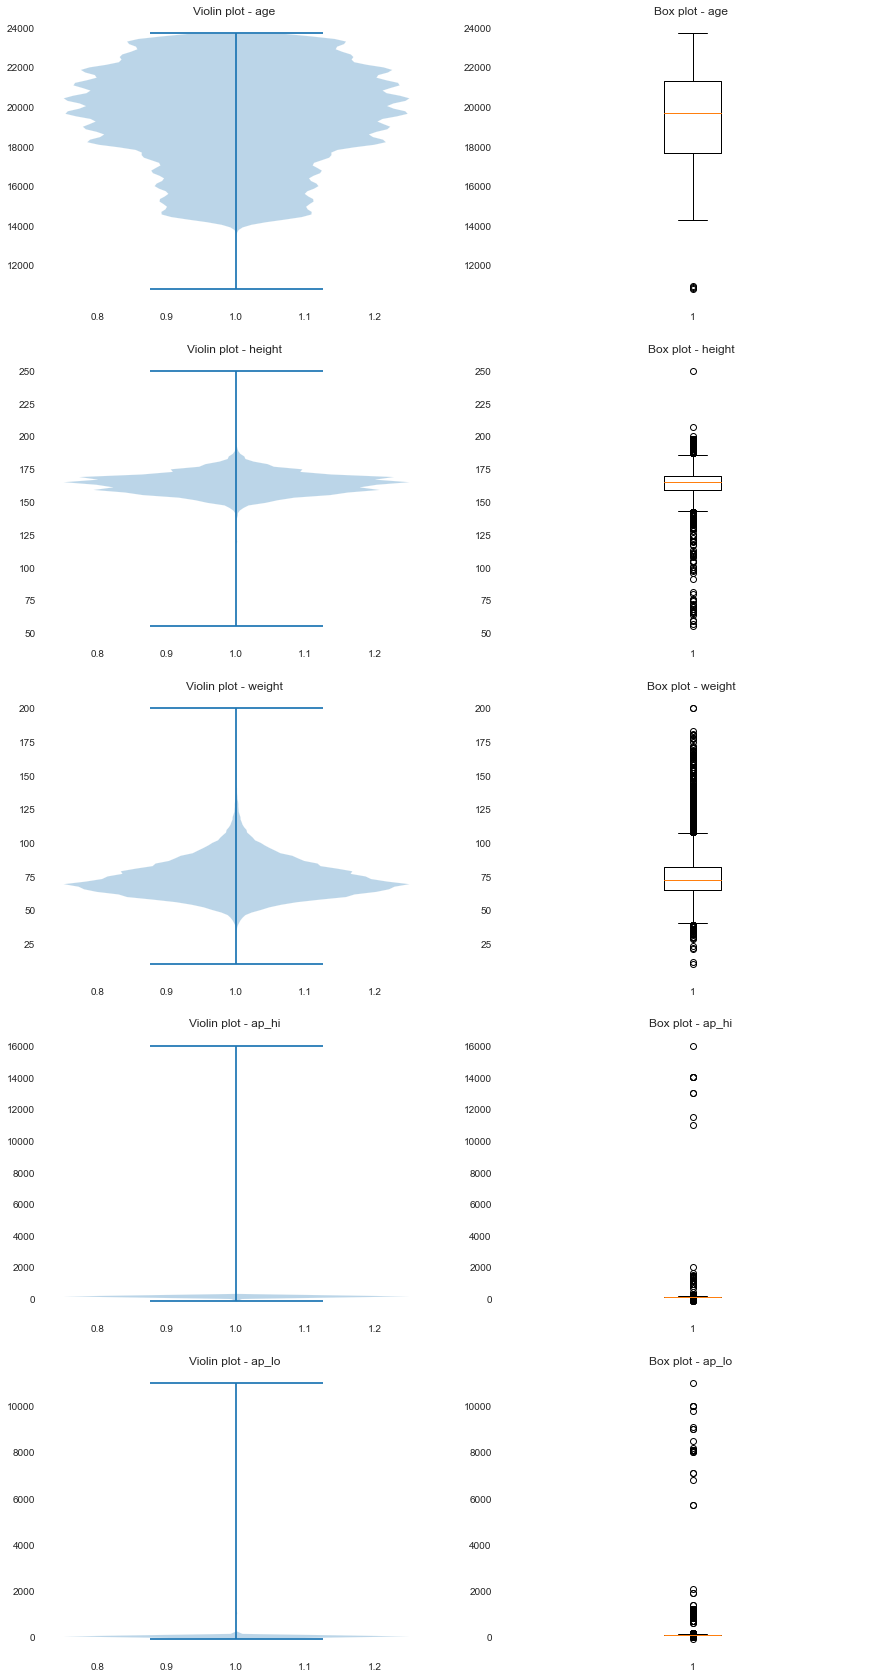

In [109]:
# Box and voilin plots of continuous features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
column = 0

def plot(axrow, x, y):    
    axrow[0].violinplot(x)
    axrow[0].set_title('Violin plot - {} '.format(cont_features[y]))
    
    axrow[1].boxplot(x)
    axrow[1].set_title('Box plot - {} '.format(cont_features[y]))
    
for row in axes:
    x = df[cont_features[column]]
    plot(row, x, column)    
    column = column+1

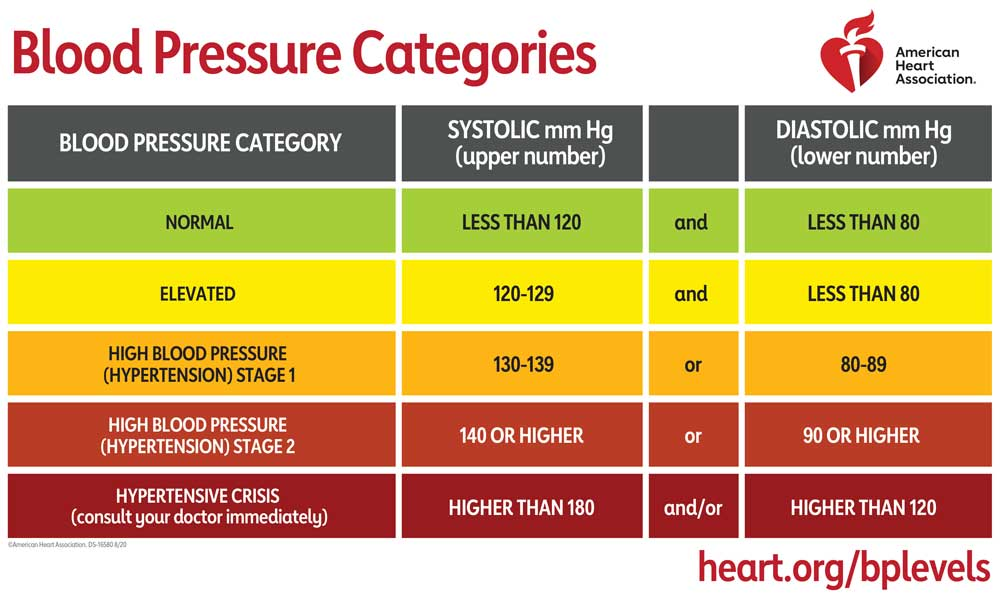

In [110]:
# Blood Pressure chart
# https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
Image(filename='bp.jpg', width=500)

From the simple statistics, box/Voilin plots and Blood Pressure chart, we can see that there are some outliers or incorrectly entered values for the feature 'Systolic blood pressure' and 'Diastolic blood pressure'. Remove the observations with abnormal Systolic blood pressure and Diastolic blood pressure observations

In [111]:
#df = pd.read_csv('cardio_train.csv', sep=';')

q_low = df["ap_lo"].quantile(0.025)
q_hi  = df["ap_lo"].quantile(0.975)

df = df[(df["ap_lo"] < q_hi) & (df["ap_lo"] > q_low)]

q_low = df["ap_hi"].quantile(0.025)
q_hi  = df["ap_hi"].quantile(0.975)

df = df[(df["ap_hi"] < q_hi) & (df["ap_hi"] > q_low)]

print(df[['ap_lo', 'ap_hi']].describe())

              ap_lo         ap_hi
count  57051.000000  57051.000000
mean      80.754430    124.883683
std        6.265868     10.947407
min       61.000000    101.000000
25%       80.000000    120.000000
50%       80.000000    120.000000
75%       80.000000    130.000000
max       99.000000    159.000000


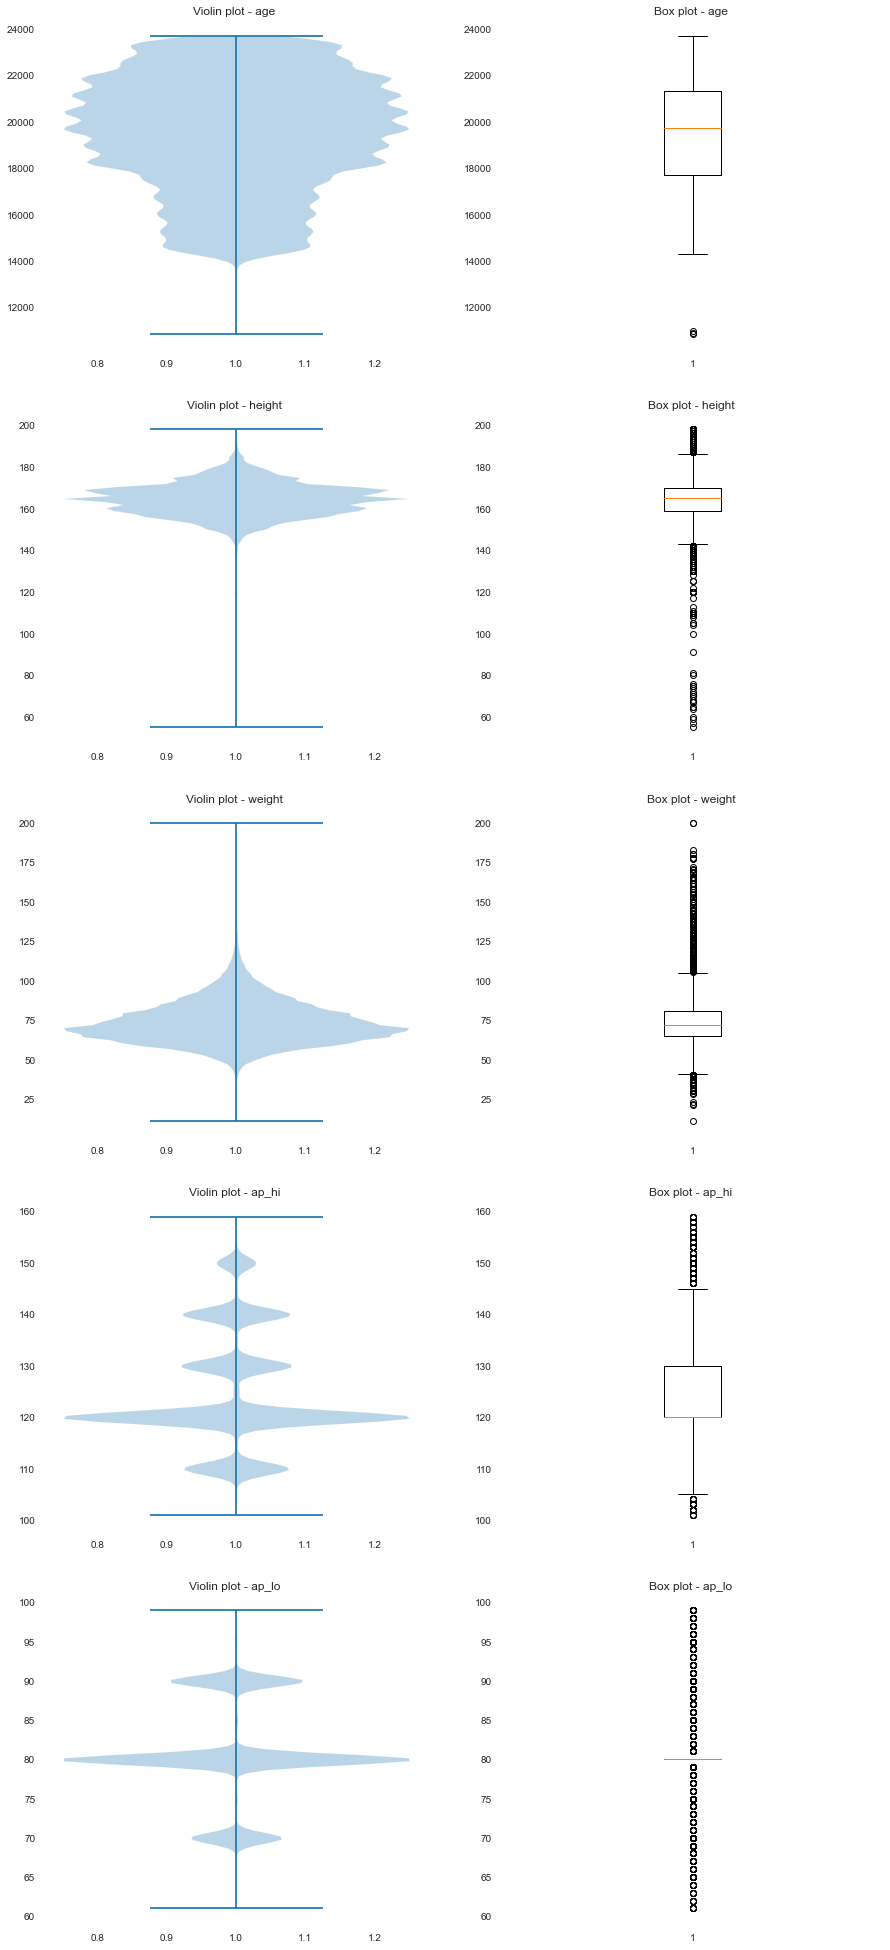

In [112]:
# Box and voilin plots of continuous features Systolic blood pressure and Diastolic blood pressure after 
# removing the outliers
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 35))
column = 0

def plot(axrow, x, y):    
    axrow[0].violinplot(x)
    axrow[0].set_title('Violin plot - {} '.format(cont_features[y]))
    
    axrow[1].boxplot(x)
    axrow[1].set_title('Box plot - {} '.format(cont_features[y]))
    
for row in axes:
    x = df[cont_features[column]]
    plot(row, x, column)    
    column = column+1

### Simple Statistics

In [113]:
#we can convert the age to number of year instead of number of days 
df['age_years'] = (df['age'] / 365).round().astype('int')
# drop the feature 'age'
df.drop('age', axis=1, inplace=True)

df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,57051.000000,57051.000000,57051.000000,57051.000000,57051.000000,57051.000000,57051.000000,57051.000000,57051.000000,57051.000000,57051.000000,57051.00000
mean,1.352614,164.557221,73.896906,124.883683,80.754430,1.348600,1.220925,0.086028,0.051358,0.803474,0.475855,53.36073
std,0.477788,8.109753,13.787815,10.947407,6.265868,0.671376,0.570798,0.280408,0.220728,0.397374,0.499421,6.73123
min,1.000000,55.000000,11.000000,101.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.00000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.00000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.00000
75%,2.000000,170.000000,81.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.00000
max,2.000000,198.000000,200.000000,159.000000,99.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.00000


Simple statistics of the count, mean, std vlaues for each variable are shown in above table. 

The interesting things we can find from above table are that: 
- The mean height is 164 cm and min and max are 55 cm and  198 cms
- The mean values of ap_hi and ap_lo are 125 and 81, respectively. These values are normal for Systolic blood pressure and Diastolic blood pressure.

In [114]:
# lets investigate what is the average age among different genders
df[df.gender == 1].describe()



,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,36934.0,36934.000000,36934.000000,36934.000000,36934.000000,36934.000000,36934.000000,36934.000000,36934.000000,36934.000000,36934.000000,36934.000000
mean,1.0,161.632777,72.387921,124.655006,80.590973,1.371446,1.231900,0.016976,0.024422,0.802215,0.480858,53.565901
std,0.0,7.008306,13.657253,11.023547,6.322817,0.689437,0.584569,0.129184,0.154357,0.398335,0.499640,6.595325
min,1.0,55.000000,21.000000,101.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,1.0,157.000000,63.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,50.000000
50%,1.0,162.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,1.0,166.000000,80.000000,130.000000,80.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,1.0,198.000000,200.000000,159.000000,99.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [115]:
df[df.gender == 2].describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,20117.0,20117.000000,20117.000000,20117.000000,20117.000000,20117.000000,20117.000000,20117.000000,20117.000000,20117.000000,20117.00000,20117.000000
mean,2.0,169.926381,76.667341,125.303524,81.054531,1.306656,1.200775,0.212805,0.100810,0.805786,0.46667,52.984043
std,0.0,7.198061,13.595433,10.793887,6.148795,0.634764,0.544047,0.409301,0.301085,0.395604,0.49890,6.958288
min,2.0,65.000000,11.000000,102.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,39.000000
25%,2.0,166.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,48.000000
50%,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,54.000000
75%,2.0,174.000000,84.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,58.000000
max,2.0,198.000000,200.000000,158.000000,99.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.00000,65.000000


- Average age of female patients is 54 years where as it is 53 years for male patients
- Average height and weight of female patients is less than male patients
- More men smoke and drink alcohol than females

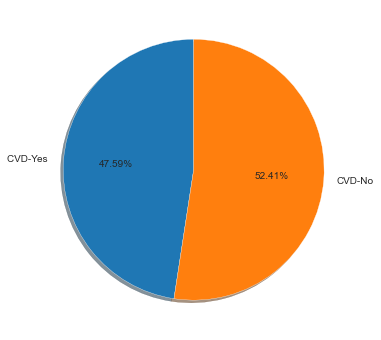

In [116]:
# Check whether dataset is balanced or not with respect to target variable 
disease = len(df[df['cardio'] == 1])
non_disease = len(df[df['cardio'] == 0])
plt.pie(x=[disease, non_disease], explode=(0, 0), labels=['CVD-Yes ', 'CVD-No'],autopct='%1.2f%%' ,
        shadow=True, startangle=90)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Looking at the Distribution of Target feature, The dataset is quite balanced with almost equal no. of Positive and Negative Classes. The two classes are not exactly 50% 

### Data Visualization of Features

<Figure size 1440x1440 with 0 Axes>

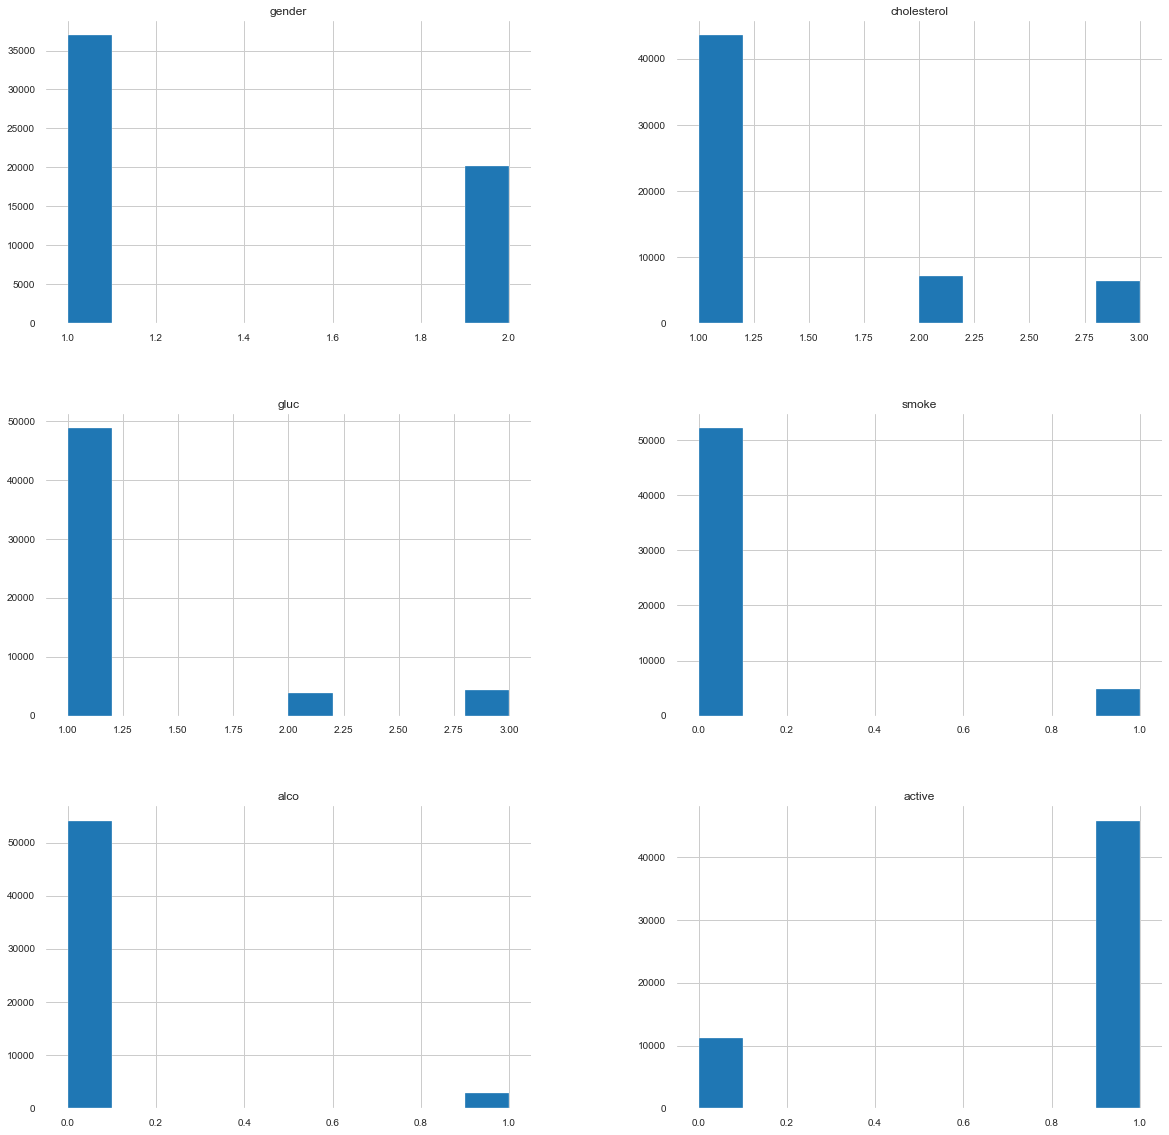

In [117]:
# Distribution of the categorical featurres
plt.figure(figsize=(20,20))
df[cat_features].hist(figsize=(20,20))
plt.show()

We can see that male and female patients are not equally represented in the dataset, same with other categorical variables Cholesterol levels, Glucose levels, smoke, alcoho and active. In all categorical variables, one category type is most dominant than other category types

<Figure size 1440x1440 with 0 Axes>

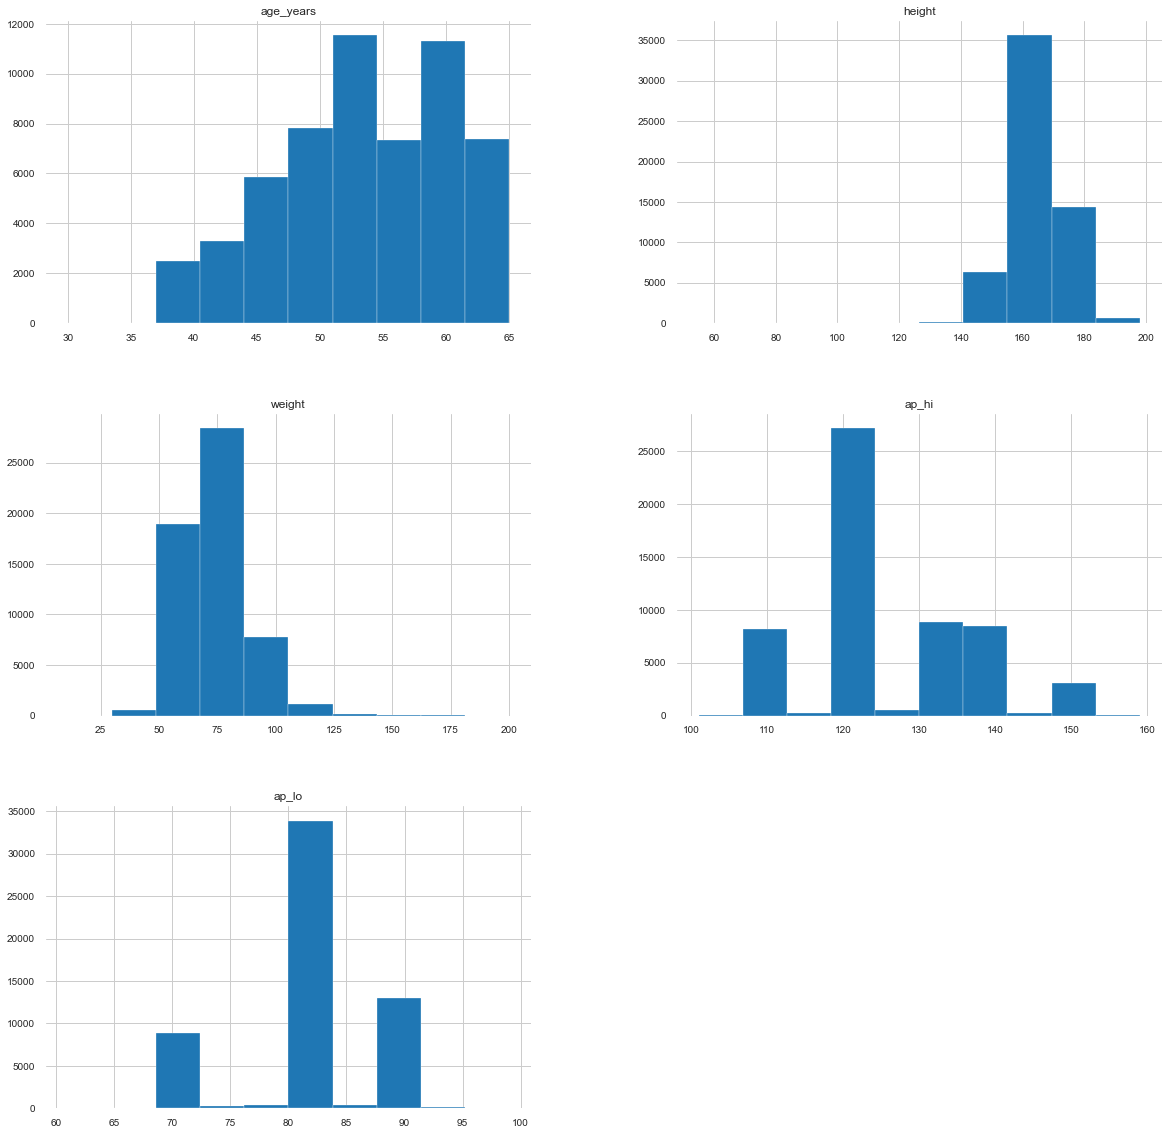

In [118]:
# Distribution of the continuous features
cont_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
plt.figure(figsize=(20,20))
df[cont_features].hist(figsize=(20,20))
plt.show()

We can see that male and female patients are not equally represented in the dataset, same with other categorical variables Cholesterol levels, Glucose levels, smoke, alcoho and active. In all categorical variables, one category type is most dominant than other category types

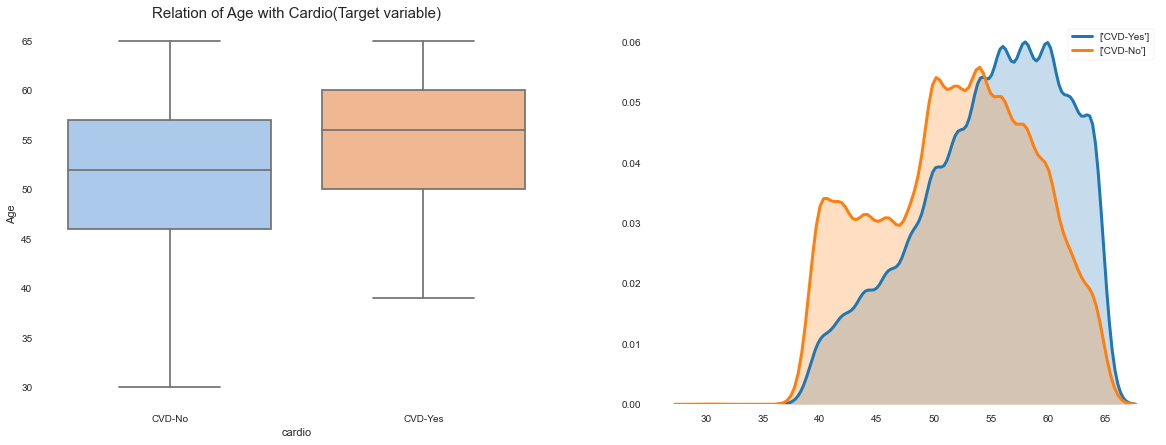

In [119]:
# Age vs Cardio
plt.rcParams['figure.figsize'] = (20, 7)
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='age_years',data=df,palette='pastel')
plt.title('Relation of Age with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('Age')

plt.subplot(1,2,2)

disease_d = df[df['cardio'] == 1]['age_years']
non_disease_d = df[df['cardio'] == 0]['age_years']

sns.distplot([disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-Yes'])

sns.distplot([non_disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-No'])

plt.show()

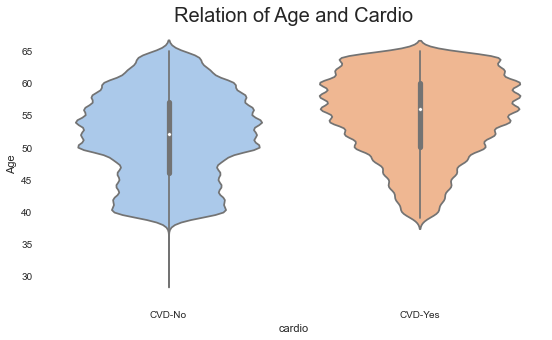

In [120]:
# Violin plot to see any pattern between age and Cardio 

plt.rcParams['figure.figsize'] = (9, 5)
sns.violinplot(df['cardio'], df['age_years'], palette = 'pastel', size = 10)
plt.title('Relation of Age and Cardio', fontsize = 20, fontweight = 30)
plt.xticks([0,1],  ['CVD-No','CVD-Yes'])
plt.ylabel('Age')
plt.show()

From boxplot/density plots, we can see that older age patients are prone to CVD compared to youger age patients and also the mean age of patients having CVD is greater than that of no-CVD patients.  

From the above violin plot between the cardio and the age of the patients, we don't see any pattern between age of patients with CVD and age of patients with no-CVD.  

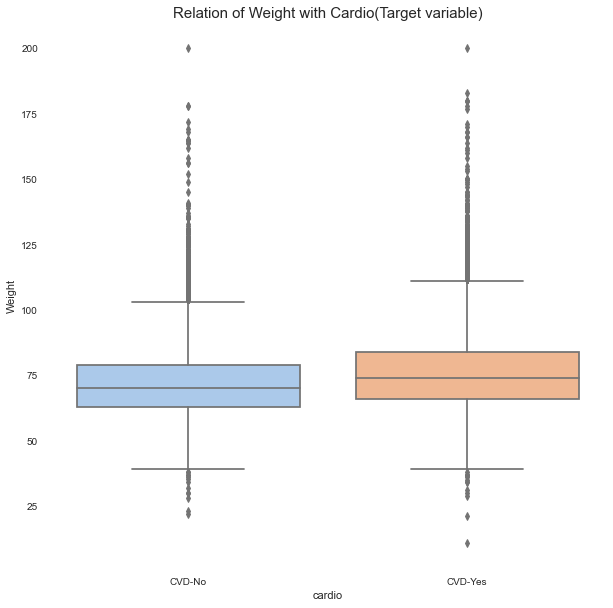

In [121]:
# Weight vs Cardio
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x='cardio',y='weight',data=df,palette='pastel')
plt.title('Relation of Weight with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('Weight')
plt.show()

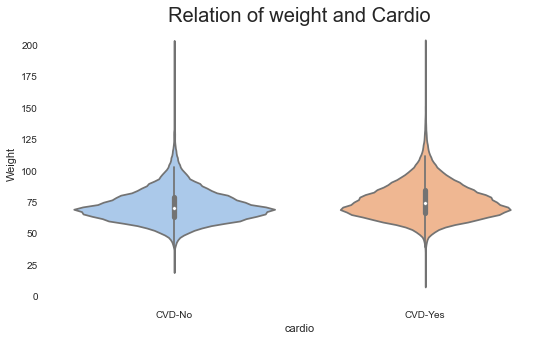

In [122]:
# Violin plot to see any pattern between Weight and Cardio 

plt.rcParams['figure.figsize'] = (9, 5)
sns.violinplot(df['cardio'], df['weight'], palette = 'pastel', size = 10)
plt.title('Relation of weight and Cardio', fontsize = 20, fontweight = 30)
plt.xticks([0,1],  ['CVD-No','CVD-Yes'])
plt.ylabel('Weight')
plt.show()

From boxplot, we can see that mean weight of patients having CVD is higher than that of non-CVD patients.  


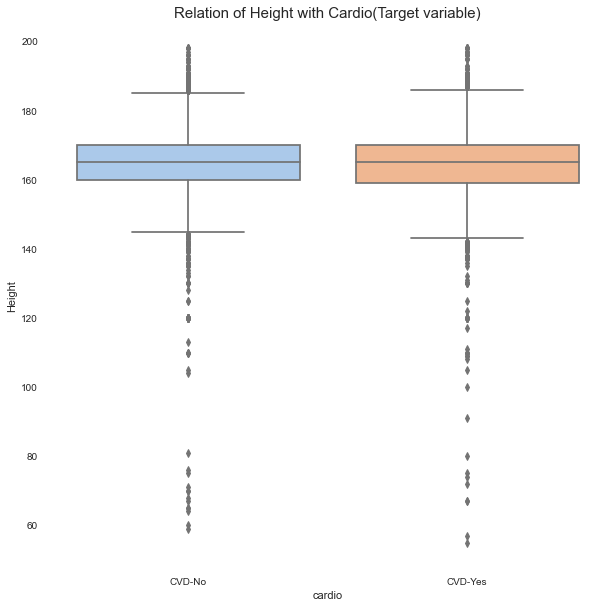

In [123]:
# Height vs Cardio
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x='cardio',y='height',data=df,palette='pastel')
plt.title('Relation of Height with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('Height')
plt.show()

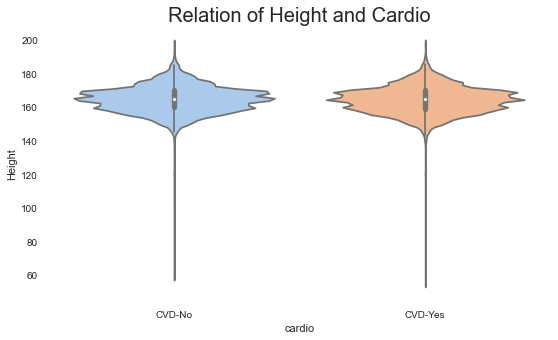

In [124]:
# Violin plot to see any pattern between Height and Cardio 

plt.rcParams['figure.figsize'] = (9, 5)
sns.violinplot(df['cardio'], df['height'], palette = 'pastel', size = 10)
plt.title('Relation of Height and Cardio', fontsize = 20, fontweight = 30)
plt.xticks([0,1],  ['CVD-No','CVD-Yes'])
plt.ylabel('Height')
plt.show()

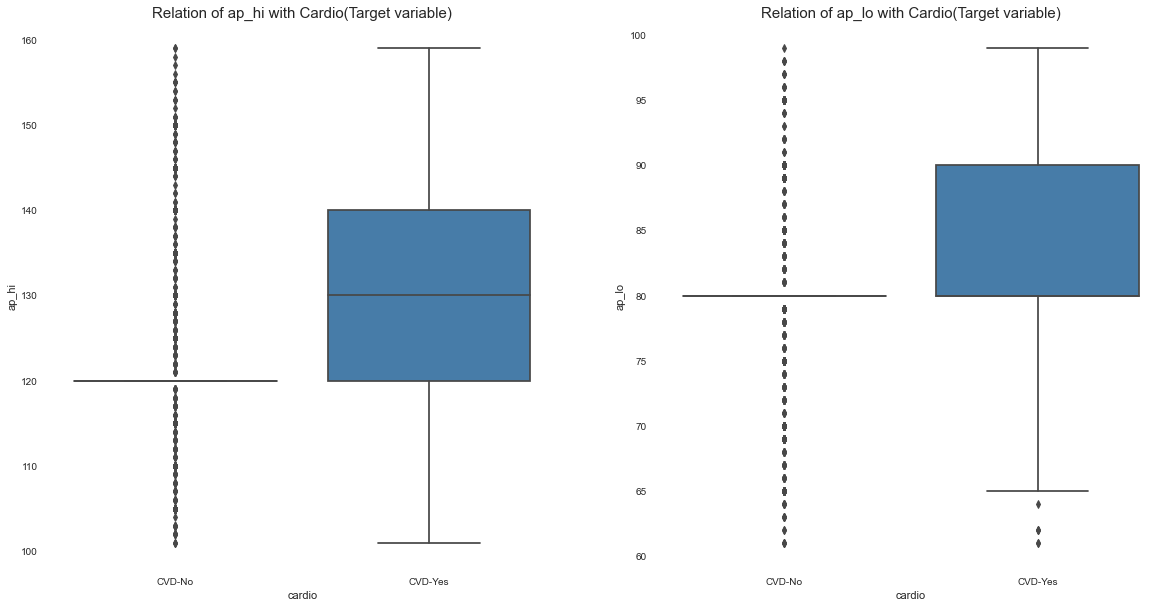

In [125]:
# ap_hi vs Cardio
plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='ap_hi',data=df,palette='Set1')
plt.title('Relation of ap_hi with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('ap_hi')

plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='ap_lo',data=df,palette='Set1')
plt.title('Relation of ap_lo with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('ap_lo')
plt.show()

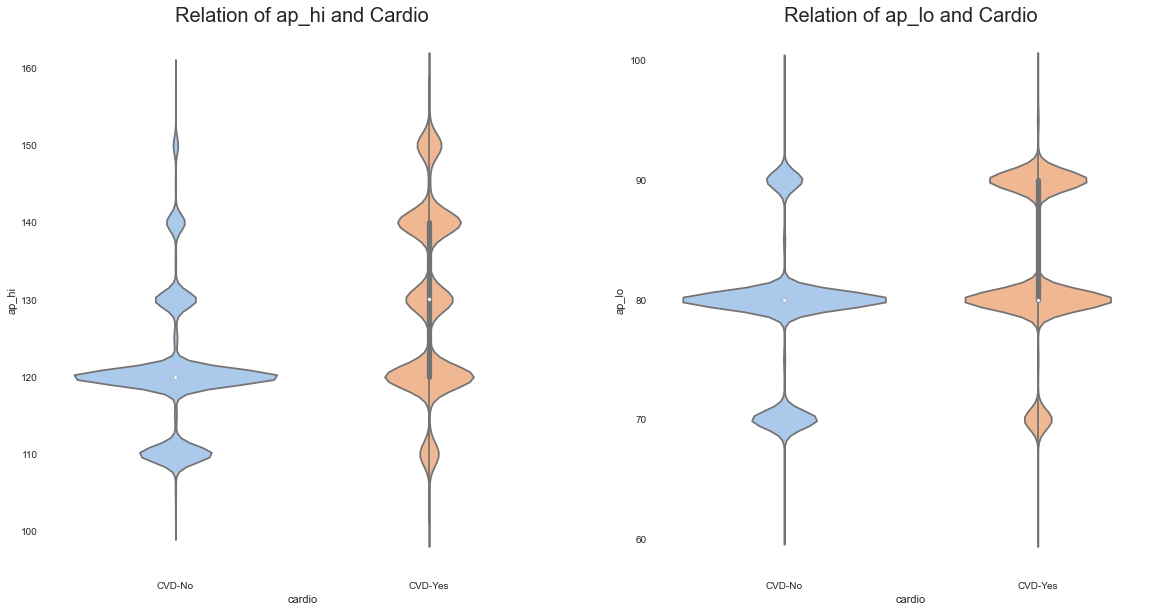

In [126]:
# Violin plot to see any pattern between Height and Cardio 

plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(1,2,1)
sns.violinplot(df['cardio'], df['ap_hi'], palette = 'pastel', size = 10)
plt.title('Relation of ap_hi and Cardio', fontsize = 20, fontweight = 30)
plt.xticks([0,1],  ['CVD-No','CVD-Yes'])
plt.ylabel('ap_hi')

plt.subplot(1,2,2)
sns.violinplot(df['cardio'], df['ap_lo'], palette = 'pastel', size = 10)
plt.title('Relation of ap_lo and Cardio', fontsize = 20, fontweight = 30)
plt.xticks([0,1],  ['CVD-No','CVD-Yes'])
plt.ylabel('ap_lo')

plt.show()


The above Bivariate plot between lom/high blood pressure and the Cardio clearly suggests that most of the patients with no-CVD has a normal blood pressure of 120/80 but the patients with CVD has blood pressures above the normal range.

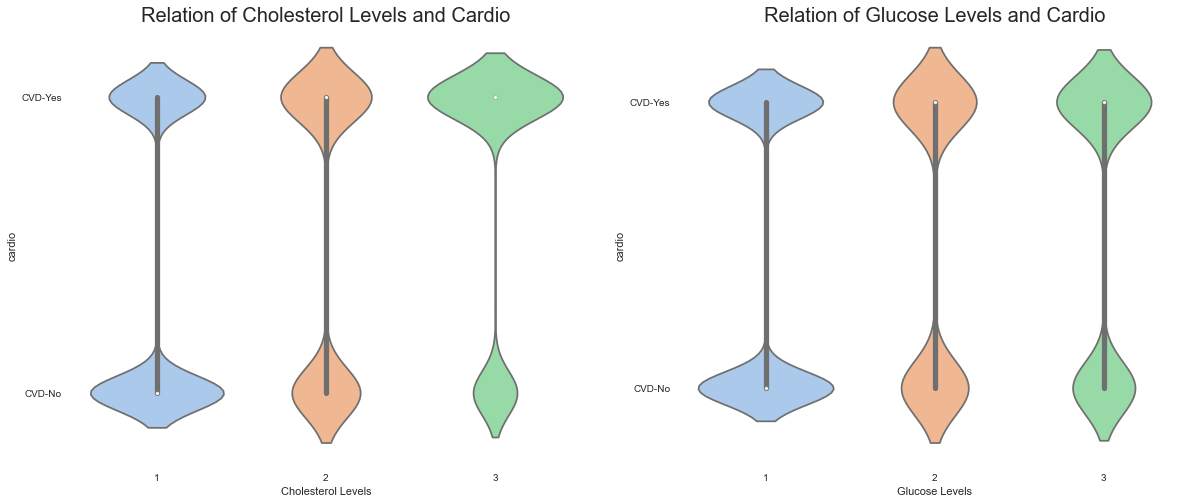

In [127]:
# Cholesterol and Glucose vs Cardio
plt.rcParams['figure.figsize'] = (20, 8)
plt.subplot(1,2,1)
sns.violinplot(df['cholesterol'], df['cardio'], palette = 'pastel', size = 10)
plt.title('Relation of Cholesterol Levels and Cardio', fontsize = 20, fontweight = 30)
plt.yticks([0,1],  ['CVD-No','CVD-Yes'])
plt.xlabel('Cholesterol Levels')

plt.subplot(1,2,2)
sns.violinplot(df['gluc'], df['cardio'], palette = 'pastel', size = 10)
plt.title('Relation of Glucose Levels and Cardio', fontsize = 20, fontweight = 30)
plt.yticks([0,1],  ['CVD-No','CVD-Yes'])
plt.xlabel('Glucose Levels')

plt.show()

The above Bivariate plot between Cardio and Cholesterol levels/Glucose levels, shows that the patients who are more likely to suffer from Heart diseases are having high values of Cholesterol levels/Glucose levels where as the patients who are very less likely to suffer from any kind of heart diseases have very low values of Cholesterol levels/Glucose levels.

## Explore Joint Attributes 

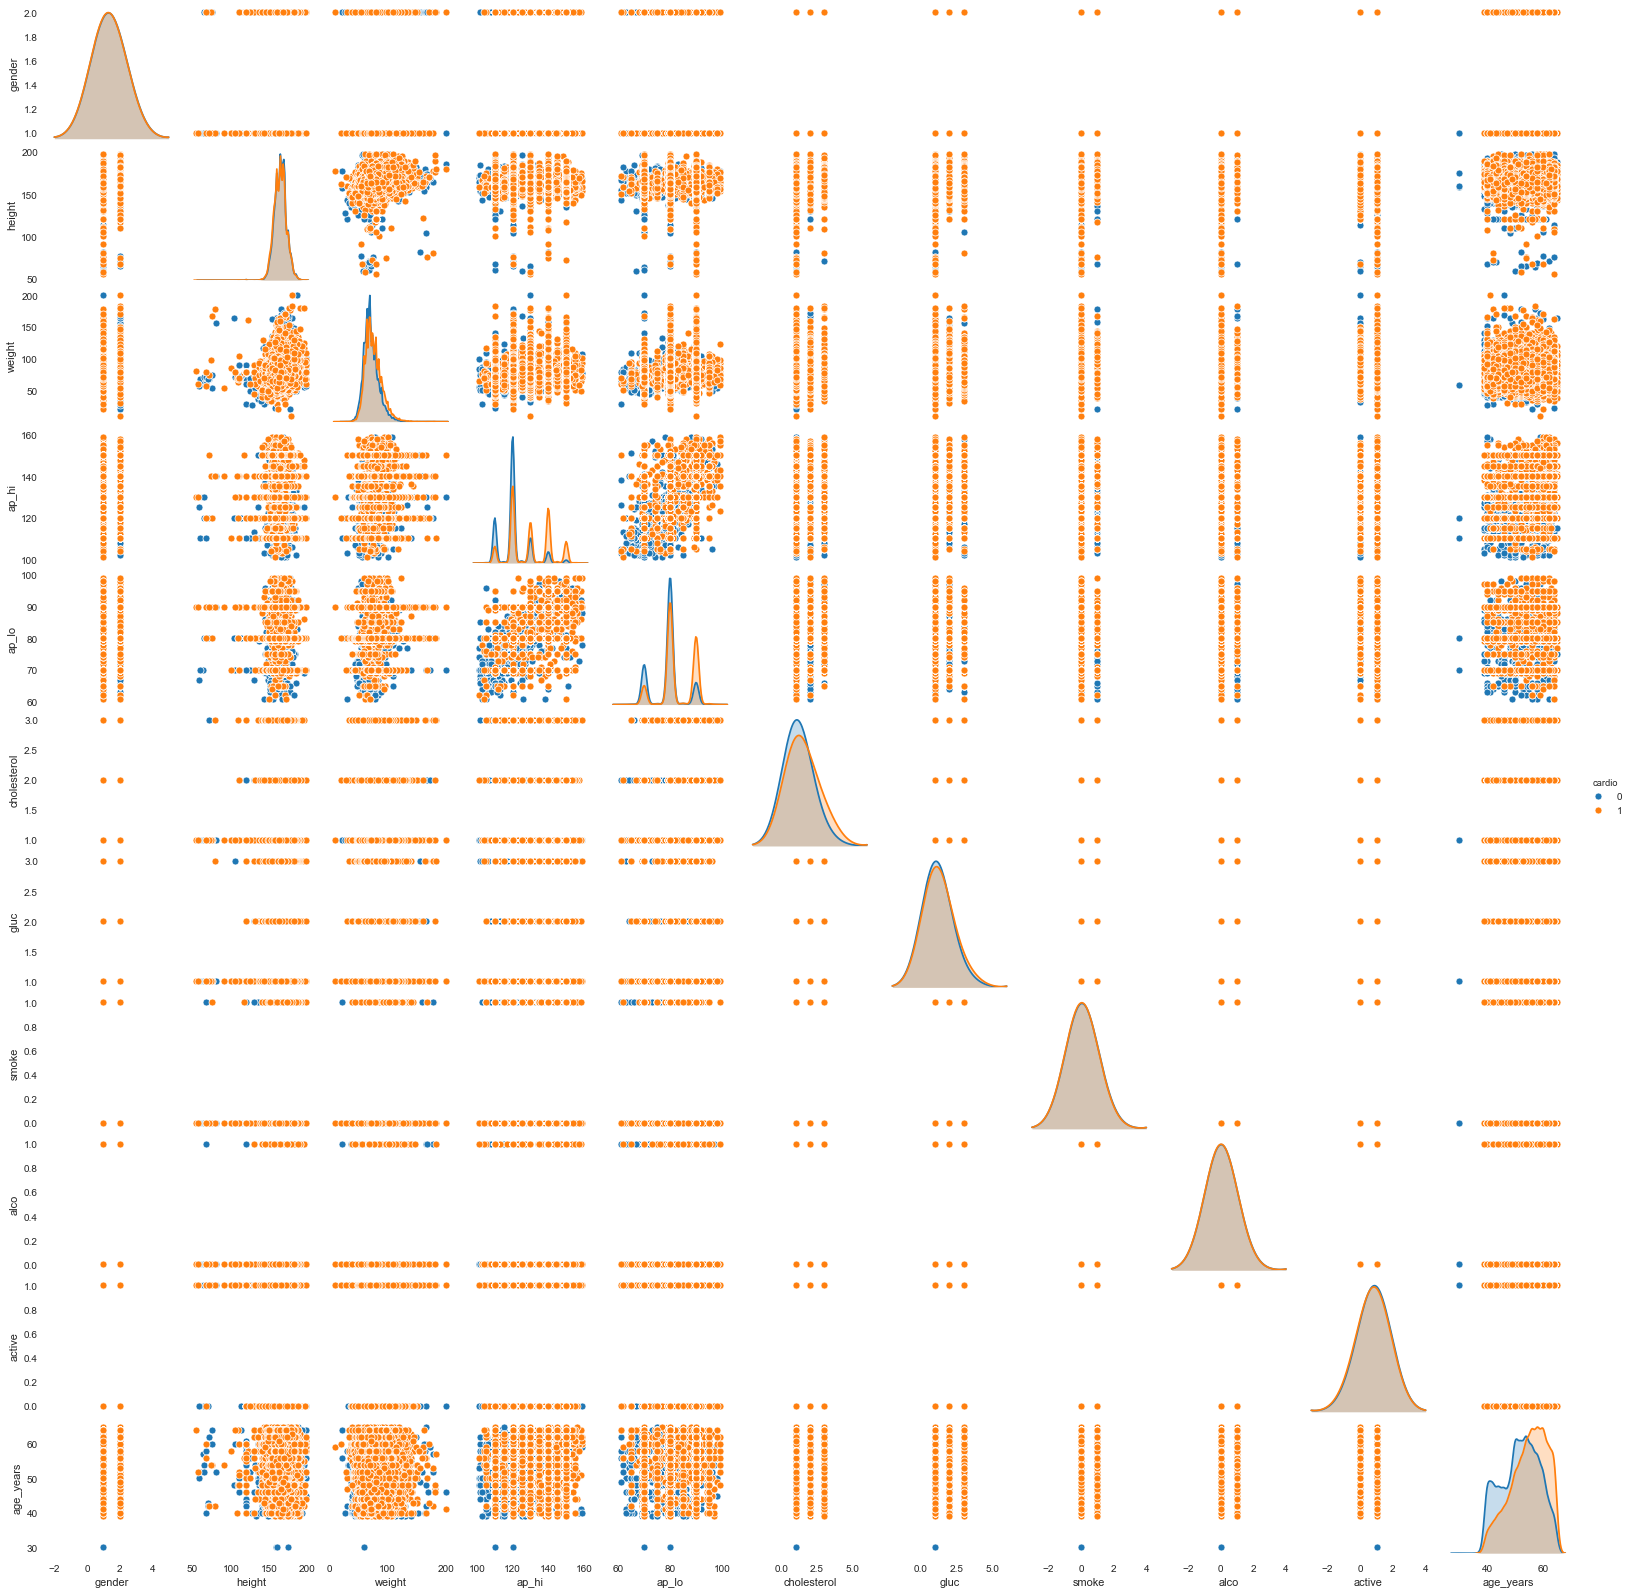

In [128]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.pairplot(df, hue='cardio', height=2, diag_kws={'bw':'1.0'})

As  there are many variables, its not easy to see any pattern or relationship between features and also Variance Inflation factor is preferred than pairwise scatter plots, because it can show the correlation of a variable with a group of other variables, and not just the the bivariate relationship between independent variables.

In [129]:
# rearrange the columns
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

In [130]:
# VIF calculations
# https://etav.github.io/python/vif_factor_python.html
def calc_vif(x):
    # calculating VIF
    vif = pd.DataFrame()
    vif['Feature'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

x = df.iloc[:,:-1]
calc_vif(x)

,Feature,VIF
0,age_years,62.409690
1,gender,11.854371
2,height,186.688461
3,weight,34.120145
4,ap_hi,230.090855
5,ap_lo,268.165015
6,cholesterol,6.685286
7,gluc,7.051233
8,smoke,1.366138
9,alco,1.203407


- Independent features 'Age' and 'Weight' have moderate multicollinearity.
- Independent features 'Gender', 'Cholesterol Level', 'Glucose level', 'Somke', Alcohol' and 'Active' have low multicollinearity.
- 'Height', 'systolic_Blood_Pressure' and ''diastolic_Blood_Pressure' have high VIF values; they can be predicted by other independent variables in the dataset. 

<Figure size 720x720 with 0 Axes>

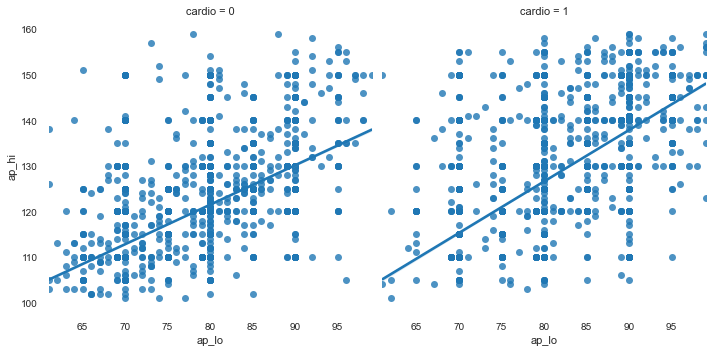

In [131]:
# lets examine how the  'systolic_Blood_Pressure' and 'diastolic_Blood_Pressure' are related
plt.figure(figsize=(10,10))
sns.lmplot(x='ap_lo',y='ap_hi',data=df,col='cardio')


We can see that, features 'systolic_Blood_Pressure' and 'diastolic_Blood_Pressure' are positively correlated

<Figure size 720x576 with 0 Axes>

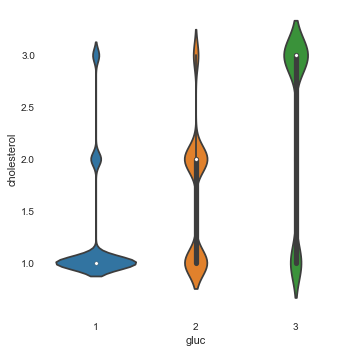

In [135]:
# Smoke and Alcohol relation
plt.figure(figsize=(10, 8))
sns.catplot(x="gluc", y="cholesterol", kind="violin", data=df);

The above violin plots shows that at lower level of glucose, the people with high cholesterol level(3) is low. With the increase of glucose level to 3, the percentage of people having high lelvel of cholesterol (level 3) increases significantly. 

### New Features

### Exceptional Work

#### Using PCA to reduce the dimentions

In [137]:
# normailize the data by feature scaling 0 - 1
from sklearn.preprocessing import MinMaxScaler
features = ["age_years", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]

# Independent features
x = df.loc[:, features].values
# dependent feature
y = df.loc[:, ['cardio']].values

# fit scaler
norm = MinMaxScaler().fit(x)

# transform data
scaled_df = norm.transform(x)
scaled_df = pd.DataFrame(scaled_df,columns=features)

scaled_df


,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.571429,1.0,0.790210,0.269841,0.155172,0.500000,0.0,0.0,0.0,0.0,1.0
1,0.714286,0.0,0.706294,0.391534,0.672414,0.763158,1.0,0.0,0.0,0.0,1.0
2,0.628571,0.0,0.769231,0.280423,0.500000,0.236842,1.0,0.0,0.0,0.0,0.0
3,0.857143,0.0,0.671329,0.296296,0.327586,0.500000,0.5,0.5,0.0,0.0,0.0
4,0.885714,0.0,0.713287,0.433862,0.500000,0.500000,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
57046,0.800000,0.0,0.769231,0.365079,0.844828,0.500000,0.0,0.0,0.0,0.0,1.0
57047,0.657143,1.0,0.790210,0.343915,0.327586,0.500000,0.0,0.0,1.0,0.0,1.0
57048,0.914286,0.0,0.720280,0.608466,0.672414,0.763158,0.5,0.5,0.0,0.0,1.0
57049,0.885714,0.0,0.755245,0.322751,0.586207,0.500000,0.0,0.5,0.0,0.0,0.0


In [158]:
scaled_df.isnull().sum()

age_years      0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

In [138]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_df)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.30010827 0.1936618  0.18013878 0.09177451 0.06771999 0.05768071
 0.0458352  0.04084397 0.01331105 0.00633109 0.00259464]


In [159]:
principalComponents

array([[-15.91855391,   9.02469579],
       [ 15.78316629, -13.36195241],
       [ -8.65368666,  -3.91413247],
       ...,
       [ 52.71263382,   1.80667349],
       [  2.18425221, -10.2074466 ],
       [ -2.54205947,   4.28193728]])

In [142]:
cumsum_var = np.cumsum(explained_variance,axis=0) 

array([0.30010827, 0.49377007, 0.67390886, 0.76568337, 0.83340335,
       0.89108406, 0.93691926, 0.97776322, 0.99107428, 0.99740536,
       1.        ])

Text(6.800000000000004, 0.5, 'Variance')

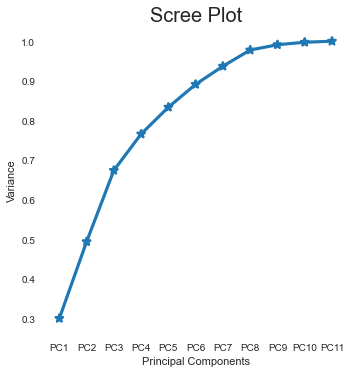

In [148]:
df_PCA = pd.DataFrame({'var':cumsum_var,
             'PC':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']})

sns.catplot(x="PC", y="var",kind="point", data=df_PCA, markers=["*"], linestyles=["-"])
plt.title('Scree Plot', fontsize = 20, fontweight = 30)
plt.xlabel('Principal Components')
plt.ylabel('Variance')

The above scree plot suggests that 6 principal Components explains 89.1 percentage variance in the data 

<Figure size 720x576 with 0 Axes>

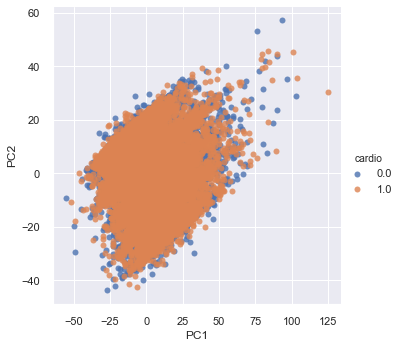

In [177]:
# lets visualize how first two principal Components will separate cardio
pc_df = pd.DataFrame(data = principalComponents , 
        columns = ['PC1', 'PC2'])
pc_df['cardio'] = df[['cardio']]

plt.figure(figsize=(10, 8))
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='cardio')  



As we know first two principal components explains only 49.3% variation, didn't give us good separation on cardio states. 

### Recursive feature Elemination

In [ ]:
# recursive Feature elimination to identify important features
from sklearn.feature_selection import RFE

rfc = RandomForestClassifier(random_state=1234)

rfe = RFE(estimator=rfc, n_features_to_select=6, step=1)

rfe.fit(X, Y)

columns = list(x.columns())
# Get the ranking of features
ranking = rfe.ranking_
# get the feature importance scores
feature_importance = rfc.feature_importances_

# ranking and their importance
rfe_selected = pd.Dataframe()
rfe_selected  = pd.concat([pd.Dataframe(columns ), pd.Dataframe(ranking), pd.Dataframe(feature_importance )])

#### Summary
